In [62]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

### Load Data

In [2]:
df = pl.read_csv('../DATASETS/student_health_data.csv')
df.head()

Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
i64,i64,str,f64,f64,f64,f64,f64,str,str,str,f64,f64,str
1,24,"""M""",50.663217,122.173015,84.41986,3.13735,9.028669,"""High""","""Moderate""","""Happy""",34.520973,16.800956,"""Moderate"""
2,21,"""F""",57.926042,110.778407,75.696145,3.699078,5.819697,"""Moderate""","""Good""","""Stressed""",16.763846,15.791154,"""Moderate"""
3,22,"""M""",59.294219,109.375673,83.803814,6.785156,5.89236,"""Low""","""Moderate""","""Happy""",44.203798,25.678437,"""Moderate"""
4,24,"""M""",76.826232,125.142227,78.091587,6.408509,6.884001,"""High""","""Poor""","""Happy""",21.776645,20.808391,"""High"""
5,20,"""M""",68.342769,107.515592,80.674937,7.264719,4.48345,"""Moderate""","""Poor""","""Happy""",8.964999,15.194045,"""Moderate"""


### Exploration

In [3]:
# Check if contains nulls
df.null_count()

Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Check if contains duplicate records
(
    df
    .group_by('Student_ID')
    .agg(
        Total=pl.col('Student_ID').count()
    )
    .filter(
        pl.col('Total') > 1
    )
)

Student_ID,Total
i64,u32


In [18]:
# Check if contains duplicate records
pl.sql("""
SELECT Student_ID, Age,	Gender,	Heart_Rate,	Blood_Pressure_Systolic, Blood_Pressure_Diastolic,
Stress_Level_Biosensor,	Stress_Level_Self_Report, Physical_Activity, Sleep_Quality,	Mood,
	Study_Hours, Project_Hours, Health_Risk_Level, COUNT(*) AS `total`
FROM df
GROUP BY Student_ID, Age,	Gender,	Heart_Rate,	Blood_Pressure_Systolic, Blood_Pressure_Diastolic,
Stress_Level_Biosensor,	Stress_Level_Self_Report, Physical_Activity, Sleep_Quality,	Mood,
	Study_Hours, Project_Hours, Health_Risk_Level
HAVING 
   total > 1
""").collect()

Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level,total
i64,i64,str,f64,f64,f64,f64,f64,str,str,str,f64,f64,str,u32


In [9]:
# Count n unique values per column
df.select(pl.all().approx_n_unique())

Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
1003,7,2,977,983,987,998,1003,3,3,3,997,1007,3


In [41]:
# df schema (columns and type)
df.schema

Schema([('Student_ID', Int64),
        ('Age', Int64),
        ('Gender', String),
        ('Heart_Rate', Float64),
        ('Blood_Pressure_Systolic', Float64),
        ('Blood_Pressure_Diastolic', Float64),
        ('Stress_Level_Biosensor', Float64),
        ('Stress_Level_Self_Report', Float64),
        ('Physical_Activity', String),
        ('Sleep_Quality', String),
        ('Mood', String),
        ('Study_Hours', Float64),
        ('Project_Hours', Float64),
        ('Health_Risk_Level', String)])

In [7]:
# describe
df.describe()

statistic,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
str,f64,f64,str,f64,f64,f64,f64,f64,str,str,str,f64,f64,str
"""count""",1000.0,1000.0,"""1000""",1000.0,1000.0,1000.0,1000.0,1000.0,"""1000""","""1000""","""1000""",1000.0,1000.0,"""1000"""
"""null_count""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""",0.0,0.0,"""0"""
"""mean""",500.5,20.96,null,70.101863,119.83538,79.854756,5.483909,5.361601,null,null,null,30.227037,14.887368,null
"""std""",288.819436,2.0036,null,9.544663,14.604307,9.641699,2.596108,2.550382,null,null,null,10.34106,4.888624,null
"""min""",1.0,18.0,"""F""",50.0,90.0,60.0,1.008491,1.002186,"""High""","""Good""","""Happy""",5.0,0.0,"""High"""
"""25%""",251.0,19.0,null,63.361031,109.390599,73.127735,3.270905,3.173556,null,null,null,23.263431,11.581571,null
"""50%""",501.0,21.0,null,70.334588,120.057046,79.684877,5.370709,5.236862,null,null,null,30.448025,14.768098,null
"""75%""",750.0,23.0,null,76.419305,130.378217,86.531931,7.674095,7.467434,null,null,null,37.235823,18.155083,null
"""max""",1000.0,24.0,"""M""",99.650104,165.929204,107.659796,9.994153,9.964115,"""Moderate""","""Poor""","""Stressed""",60.0,32.720325,"""Moderate"""


### Visualizations

C:\Users\kiramishima\AppData\Local\Temp\ipykernel_34488\405930993.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.to_pandas().hist(ax=ax)


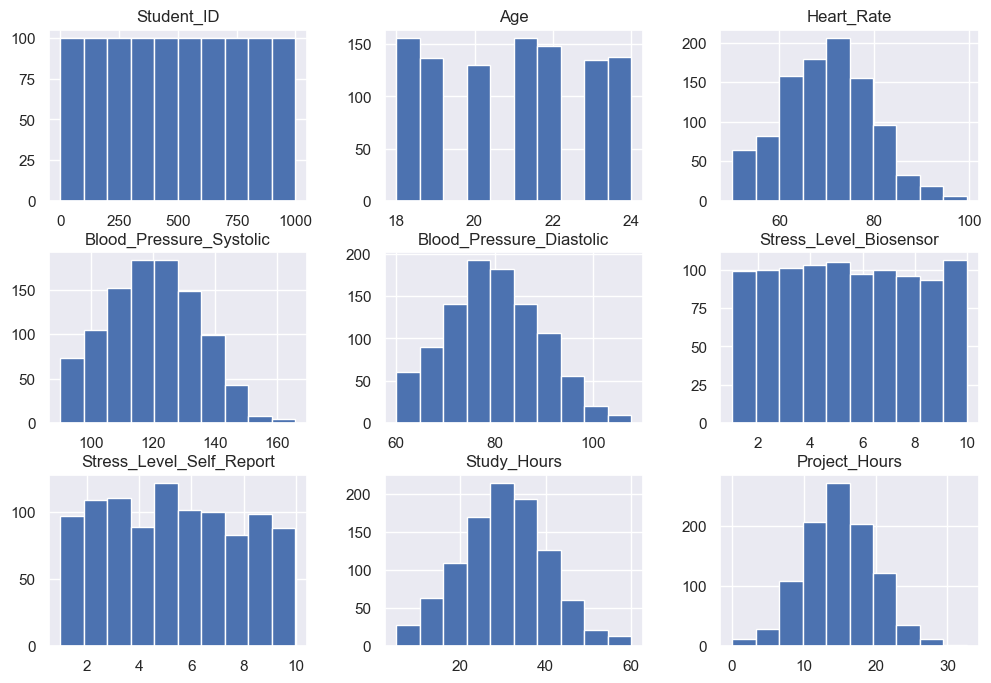

In [26]:
# Histogram
fig, ax = plt.subplots(figsize=(12, 8))

df.to_pandas().hist(ax=ax)
plt.show()

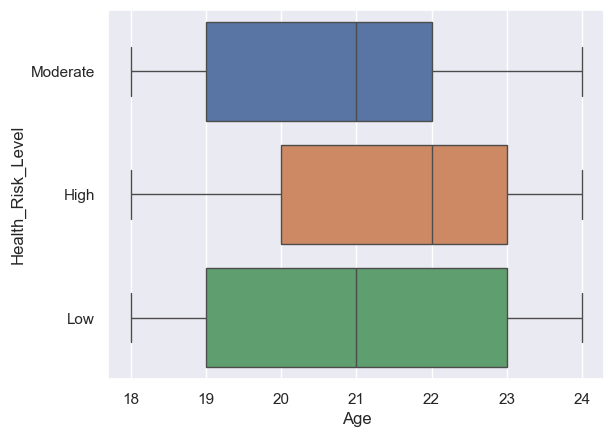

In [33]:
sns.boxplot(df, y='Health_Risk_Level', x="Age", hue='Health_Risk_Level')
plt.show()

> It indicates that students between 19 and 23 years have low and moderate health risks, but students between 20 and 23 years have a chance of getting high health risks.

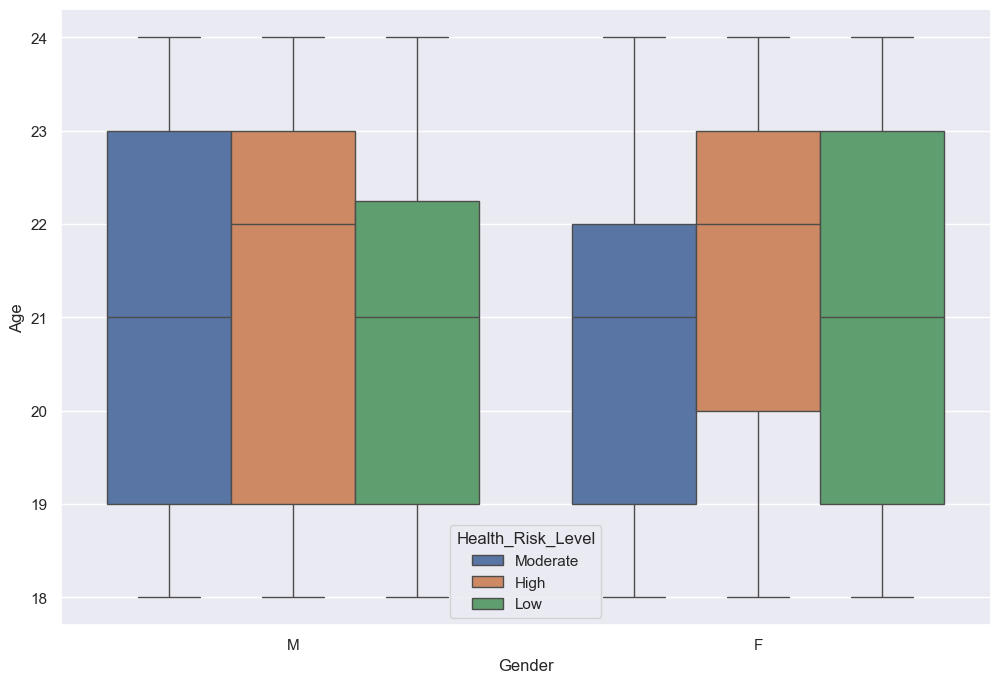

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(df, y='Age', x="Gender", hue='Health_Risk_Level', ax=ax)
plt.show()

> It indicates that female students between 19 and 22 years have more chances of getting moderate health risks, but male students between 19 and 22 years have a chance of getting moderate health risks. In conclusion, Dataset don't present outliers.

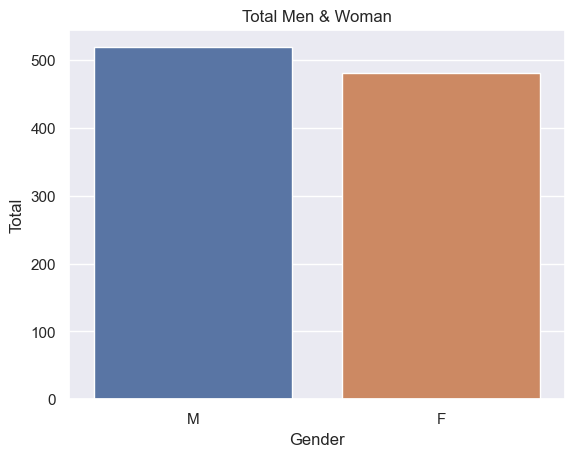

In [43]:
# Group by Sex
grp_by_sex = df.group_by("Gender").agg(total=pl.len()).sort(by="total", descending=True)

fig, ax = plt.subplots()

g = sns.barplot(grp_by_sex, x='Gender', y='total', hue='Gender', ax=ax)
g.set(
    title="Total Men & Woman",
    ylabel="Total"
)

plt.show()

In [45]:
df.schema

Schema([('Student_ID', Int64),
        ('Age', Int64),
        ('Gender', String),
        ('Heart_Rate', Float64),
        ('Blood_Pressure_Systolic', Float64),
        ('Blood_Pressure_Diastolic', Float64),
        ('Stress_Level_Biosensor', Float64),
        ('Stress_Level_Self_Report', Float64),
        ('Physical_Activity', String),
        ('Sleep_Quality', String),
        ('Mood', String),
        ('Study_Hours', Float64),
        ('Project_Hours', Float64),
        ('Health_Risk_Level', String)])

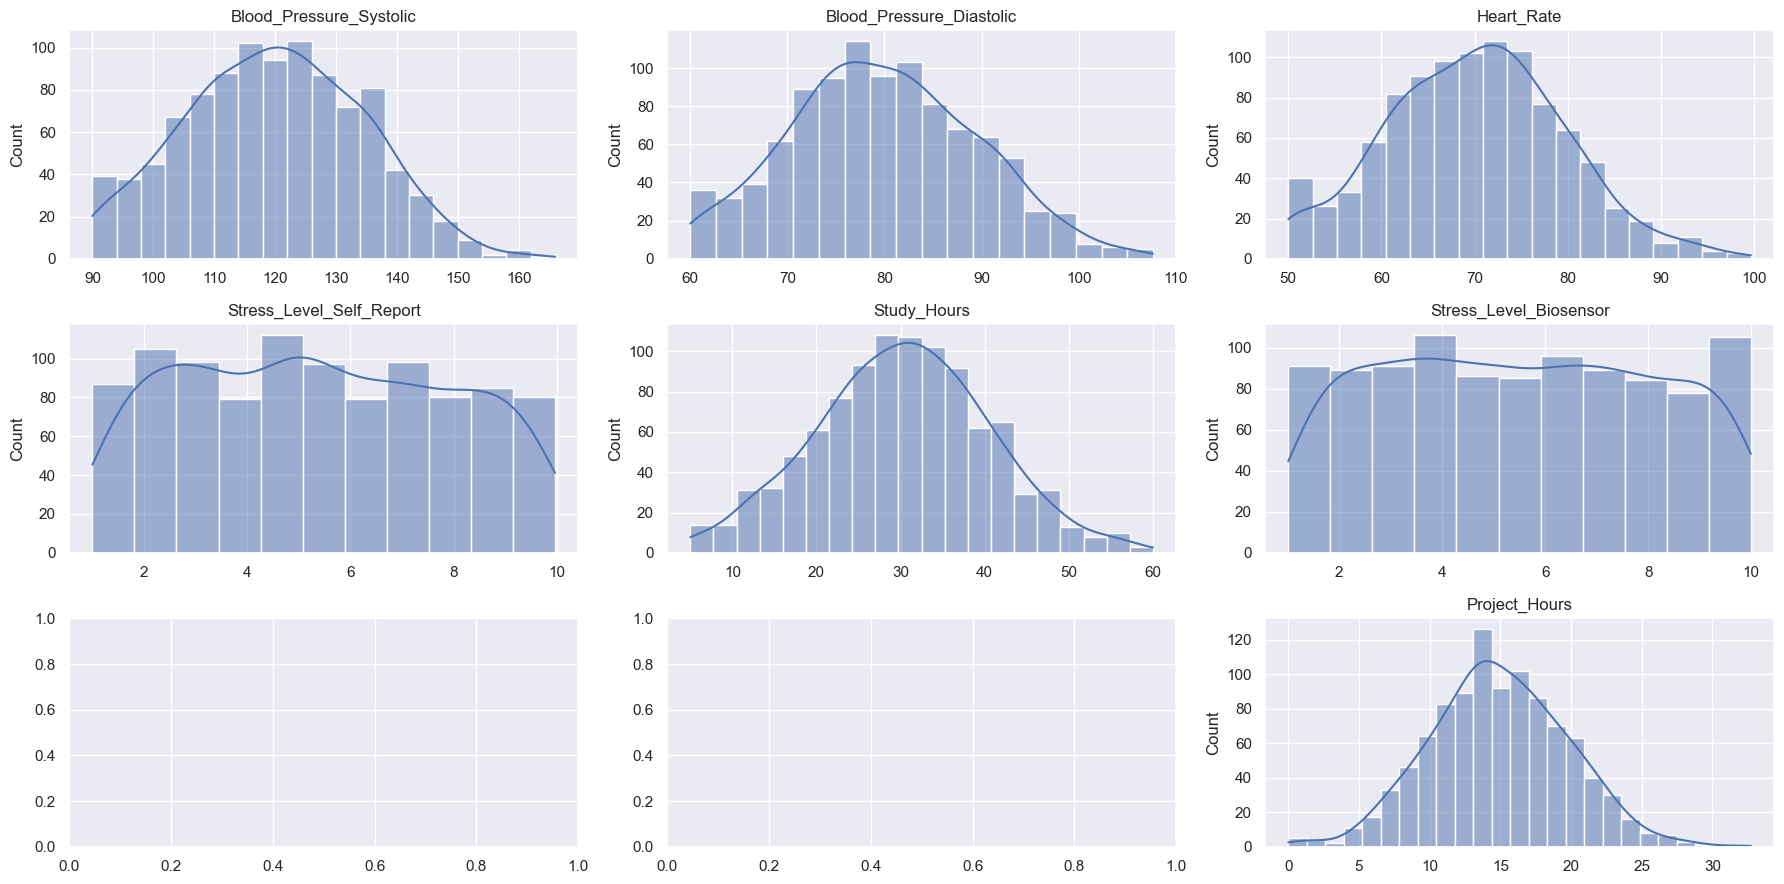

In [54]:
# Histograms and KDE

numeric_values = ['Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Stress_Level_Biosensor', 'Stress_Level_Self_Report', 'Study_Hours',
'Project_Hours']

fig, ax = plt.subplots(3, 3, figsize=(18, 9))
for idx, column in enumerate(numeric_values[:3]):
    sns.histplot(data=df[column], ax=ax[0][idx-1], kde=True)
    ax[0][idx-1].set_title(column)
    
for idx, column in enumerate(numeric_values[3:6]):
    sns.histplot(data=df[column], ax=ax[1][idx-1], kde=True)
    ax[1][idx-1].set_title(column)

for idx, column in enumerate(numeric_values[6:]):
    sns.histplot(data=df[column], ax=ax[2][idx-1], kde=True)
    ax[2][idx-1].set_title(column)

plt.tight_layout()
plt.show()

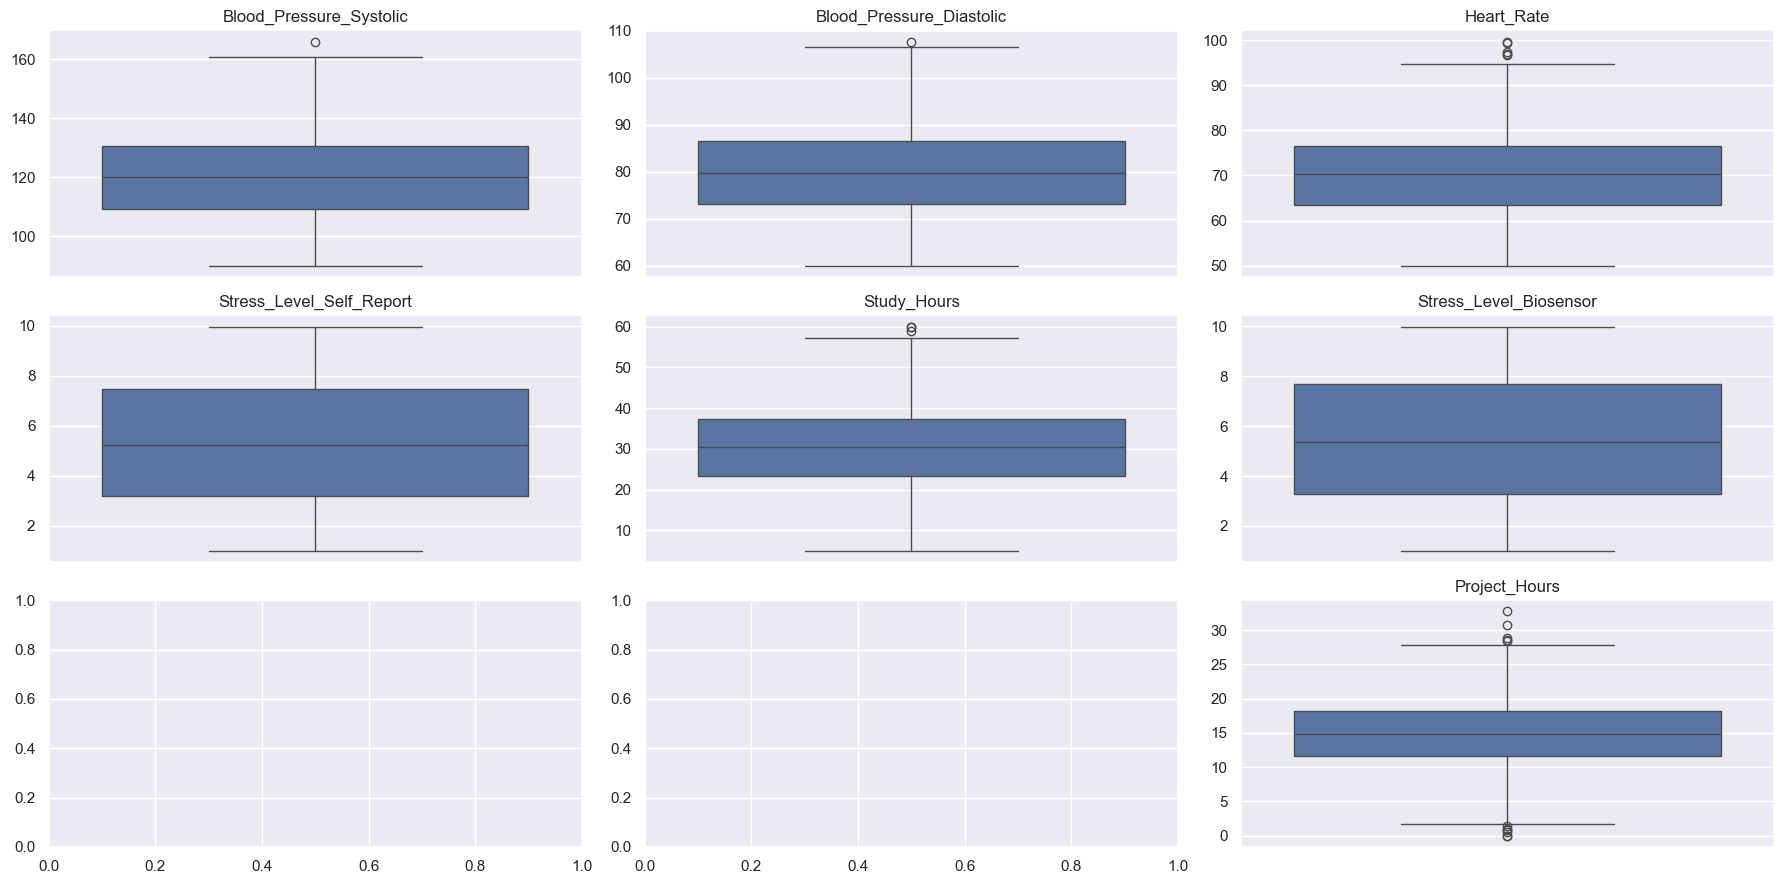

In [55]:
# Boxplots

fig, ax = plt.subplots(3, 3, figsize=(18, 9))
for idx, column in enumerate(numeric_values[:3]):
    sns.boxplot(data=df[column], ax=ax[0][idx-1])
    ax[0][idx-1].set_title(column)
    
for idx, column in enumerate(numeric_values[3:6]):
    sns.boxplot(data=df[column], ax=ax[1][idx-1])
    ax[1][idx-1].set_title(column)

for idx, column in enumerate(numeric_values[6:]):
    sns.boxplot(data=df[column], ax=ax[2][idx-1])
    ax[2][idx-1].set_title(column)
# Show the plot
plt.tight_layout()
plt.show()

> Some variables or columns presents outliers.

In [59]:
df_numerical = df.select(pl.col(pl.Int64, pl.Float64).exclude("Student_ID"))
df_numerical

Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
i64,f64,f64,f64,f64,f64,f64,f64
24,50.663217,122.173015,84.41986,3.13735,9.028669,34.520973,16.800956
21,57.926042,110.778407,75.696145,3.699078,5.819697,16.763846,15.791154
22,59.294219,109.375673,83.803814,6.785156,5.89236,44.203798,25.678437
24,76.826232,125.142227,78.091587,6.408509,6.884001,21.776645,20.808391
20,68.342769,107.515592,80.674937,7.264719,4.48345,8.964999,15.194045
…,…,…,…,…,…,…,…
23,68.185217,126.031324,69.156288,8.318278,6.841725,30.554113,9.491591
18,77.720216,100.627116,75.569051,6.295881,4.15213,29.28585,22.819961
24,85.313237,124.362792,91.817614,2.896868,9.253887,15.330941,19.010784


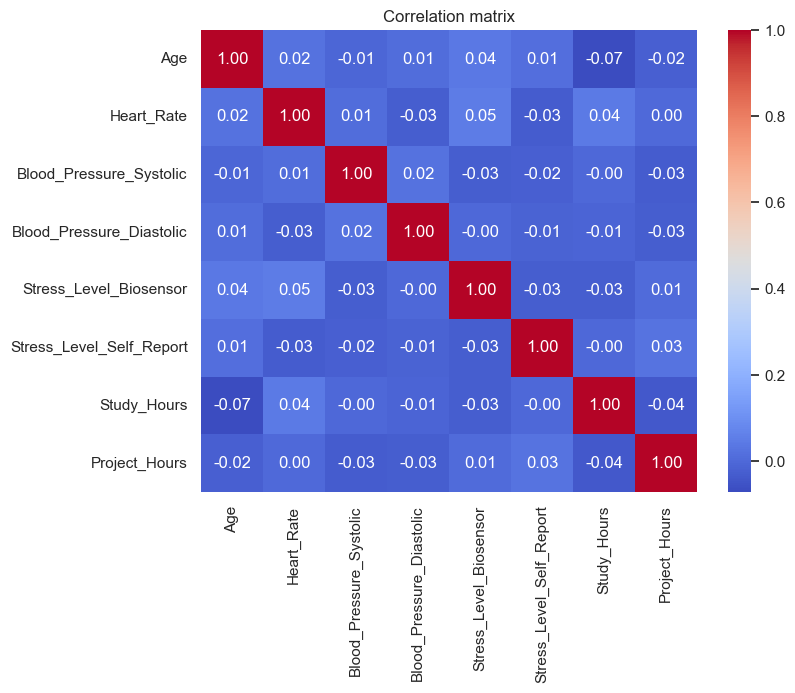

In [65]:
# Correlation Matrix
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=df_numerical.columns, yticklabels=df_numerical.columns)
plt.title('Correlation matrix')
plt.show()

In [75]:
# Seleccionar las columnas con mejor correlación 
# Aquí seleccionamos las correlaciones mayores a un umbral (por ejemplo, 0.8)

threshold = 0.01
high_correlation_columns = correlation_matrix.to_pandas().columns[(correlation_matrix.to_pandas().abs() > threshold).any()]
# Crear un nuevo DataFrame con las columnas seleccionadas
df_high_correlation = df.to_pandas()[high_correlation_columns]
print("Columns with best correlation:", high_correlation_columns)

Columns with best correlation: Index(['Age', 'Heart_Rate', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Stress_Level_Biosensor',
       'Stress_Level_Self_Report', 'Study_Hours', 'Project_Hours'],
      dtype='object')
